## Performing Clustering for the crime data and identifying the number of clusters formed.

## 1. K Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
crime = pd.read_csv('crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [20]:
crime.Murder = crime.Murder.astype(int)
crime.Assault = crime.Assault.astype(int)
crime.UrbanPop = crime.UrbanPop.astype(int)
crime.Rape =crime.Rape.astype(int)
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13,236,58,21
1,Alaska,10,263,48,44
2,Arizona,8,294,80,31
3,Arkansas,8,190,50,19
4,California,9,276,91,40


In [24]:
crime.dtypes

Unnamed: 0    object
Murder         int32
Assault        int32
UrbanPop       int32
Rape           int32
dtype: object

In [29]:
def std_fn(x):
    z = (x-x.mean())/(x.std())
    return z
scaled_data = std_fn(crime.iloc[:,1:])
scaled_data.head()

,Murder,Assault,UrbanPop,Rape
0,1.264495,0.782839,-0.520907,0.019163
1,0.584659,1.106823,-1.211764,2.467742
2,0.131435,1.478803,0.998980,1.083762
3,0.131435,0.230868,-1.073593,-0.193757
4,0.358047,1.262814,1.758923,2.041902


In [25]:
## Normalization function
## from sklearn.preprocessing import StandardScaler
## scaler = StandardScaler()
## scaled_crimedata = scaler.fit(crime.iloc[:,1:])

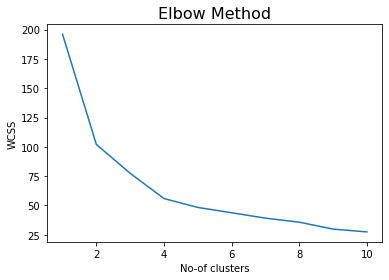

In [33]:
## To find optimal no.of clusters we ar plotting elbow graph
## kmeans alogrithm aims to choose centroid that minimize the inertia which is nothing but within sumofsquares criterion

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method', fontsize = 16)
plt.xlabel('No-of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
## Building Kmeans clustering model with k = 4

from sklearn.cluster import KMeans
clusters = KMeans(4, random_state = 40)
clusters.fit(scaled_data)

KMeans(n_clusters=4, random_state=40)

In [35]:
clusters.labels_

array([0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 3, 0, 3, 2, 1, 2,
       3, 0, 2, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 3, 1])

In [37]:
clusters.cluster_centers_

array([[ 1.4061274 ,  0.8743346 , -0.81452109,  0.01916279],
       [-0.49174802, -0.38260013,  0.57582979, -0.26029462],
       [ 0.70668078,  1.03944141,  0.72263703,  1.28030397],
       [-0.96676161, -1.106601  , -0.93010687, -0.97173384]])

In [39]:
crime['clusters'] = clusters.labels_

In [40]:
crime.groupby('clusters').mean().reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
0,0,13.625000,243.625000,53.750000,21.000000
1,1,5.250000,138.875000,73.875000,18.375000
2,2,10.538462,257.384615,76.000000,32.846154
3,3,3.153846,78.538462,52.076923,11.692308


## Hierarchical Clustering

In [42]:
## 2.Hierarchical Clustering

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [43]:
crimedata = pd.read_csv('crime_data.csv')

In [45]:
crimedata.Murder =crimedata.Murder.astype(int)
crimedata.Assault = crimedata.Assault.astype(int)
crimedata.UrbanPop = crimedata.UrbanPop.astype(int)
crimedata.Rape =crimedata.Rape.astype(int)
crimedata.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13,236,58,21
1,Alaska,10,263,48,44
2,Arizona,8,294,80,31
3,Arkansas,8,190,50,19
4,California,9,276,91,40


In [46]:
crimedata.shape

(50, 5)

In [47]:
## Standardization function
def stand_fn(x):
    i = (x - x.mean())/(x.std())
    return i

scaled_data = stand_fn(crimedata.iloc[:,1:])
scaled_data.head()

,Murder,Assault,UrbanPop,Rape
0,1.264495,0.782839,-0.520907,0.019163
1,0.584659,1.106823,-1.211764,2.467742
2,0.131435,1.478803,0.998980,1.083762
3,0.131435,0.230868,-1.073593,-0.193757
4,0.358047,1.262814,1.758923,2.041902


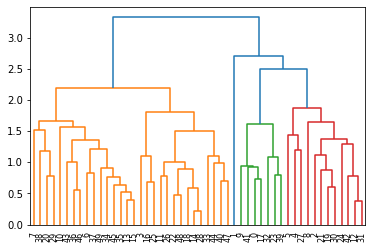

In [53]:
## Creating Dendrograms

dendrogram1 = sch.dendrogram(sch.linkage(scaled_data, method = 'average'))

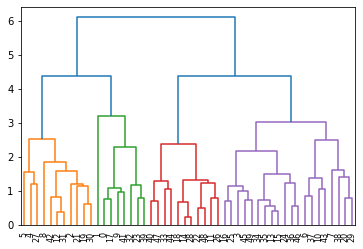

In [54]:
dendrogram2 = sch.dendrogram(sch.linkage(scaled_data, method = 'complete'))

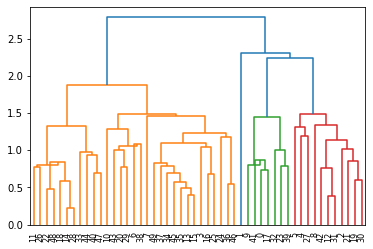

In [55]:
dendrogram3 = sch.dendrogram(sch.linkage(scaled_data, method = 'centroid'))

In [63]:
## create clusters
hc = AgglomerativeClustering(n_clusters = 4, affinity ='euclidean', linkage ='complete')

In [64]:
## save clusters for chart
y_hc = hc.fit_predict(scaled_data)
clusters = pd.DataFrame(y_hc, columns = ['Clusters'])
clusters.head()

,Clusters
0,0
1,0
2,3
3,1
4,3


In [65]:
scaled_data['h_clusterid']= pd.Series(y_hc)
crimedata['h_clusterid'] = pd.Series(y_hc)
crimedata.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13,236,58,21,0
1,Alaska,10,263,48,44,0
2,Arizona,8,294,80,31,3
3,Arkansas,8,190,50,19,1
4,California,9,276,91,40,3


In [66]:
result = crimedata.iloc[:,1:].groupby(crimedata.h_clusterid).mean()
result

,Murder,Assault,UrbanPop,Rape,h_clusterid
h_clusterid,,,,,
0,13.875000,252.750000,53.500000,24.125000,0
1,5.800000,140.400000,70.350000,18.650000,1
2,2.363636,73.000000,52.000000,10.909091,2
3,10.727273,264.090909,79.090909,32.272727,3


### Inferences drawn from these clustering techniques are: 
1. Clusterid 0 group is having highest murder rate, high assault rate with avg urban pop of 54 has avg rape rate of 24
2. Clusterid 1 is having less murder rate, with average urban population of 70, avg assault rate is 140 and low rape rate 
3. Clusterid 2 is having least murder rate, assault rate and rape rate with avg Urban pop of 52
4. Clusterid 3 is having high murder rate, assault rate and highest rape rate with avg pop of 79